# BlackMarble class

This class is used to approximate the economic exposure. It models countries and provinces interpolating the GDP and income group values through the night light intensities for a specific year.

The night light images used are the following:
- year 2012 and 2016: https://earthobservatory.nasa.gov/Features/NightLights (15 arcsec resolution (~500m))
- from 1992 until 2013: https://ngdc.noaa.gov/eog/dmsp/downloadV4composites.html (30 arcsec resolution (~1km), stable lights)

By default, for years higher than 2013 the NASA images are used, whilst for 2013 and earlier years the NOAA ones are considered. However, there is a flag which allows to choose the closest NASA or NOAA images. The default resolution is that of the image, but any resolution can be set and will be computed by interpolation.

Regarding the GDP (nominal GDP at current USD) and income group values, they are obtained from the [World Bank](https://data.worldbank.org) using the [pandas-datareader](https://pandas-datareader.readthedocs.io/en/latest/remote_data.html) API. If a value is missing, the value of the closest year is considered. When no values are provided from the World Bank, we use the [Natural Earth](https://www.naturalearthdata.com) repository values.

The `BlackMarble` class inherits from the [`Exposures`](climada_entity_Exposures.ipynb#Exposures-class) class. It provides a `set_countries()` method which enables to model a country using different settings. The first time a night light image is used, it is downloaded and stored locally. This might take some time.

With the next commands, we can model Iran and Turkey in the years 1992 and 2013 with the default resolution of ~1km. Please take into account that the NOAA images need to be calibrated in order to perform proper comparision between years.

2019-10-29 21:05:44,654 - climada - DEBUG - Loading default config file: /Users/aznarsig/Documents/Python/climada_python/climada/conf/defaults.conf
2019-10-29 21:05:49,408 - climada.util.finance - INFO - GDP IRN 1993: 6.374e+10.
2019-10-29 21:05:49,506 - climada.util.finance - INFO - Income group IRN 1992: 2.
2019-10-29 21:05:50,227 - climada.util.finance - INFO - GDP TUR 1992: 1.585e+11.
2019-10-29 21:05:50,294 - climada.util.finance - INFO - Income group TUR 1992: 2.
2019-10-29 21:05:50,297 - climada.entity.exposures.black_marble - INFO - Nightlights from NOAA's earth observation group for year 1992.
2019-10-29 21:05:50,557 - climada.entity.exposures.black_marble - INFO - Processing country Iran.
2019-10-29 21:05:54,739 - climada.entity.exposures.black_marble - INFO - Generating resolution of approx 1.0 km.
2019-10-29 21:05:55,079 - climada.entity.exposures.black_marble - INFO - Processing country Turkey.
2019-10-29 21:05:57,056 - climada.entity.exposures.black_marble - INFO - Genera

/Users/aznarsig/Documents/Python/climada_python/climada/util/plot.py:318: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  fig.tight_layout()


2019-10-29 21:06:20,871 - climada.util.finance - INFO - GDP IRN 2013: 4.674e+11.
2019-10-29 21:06:20,949 - climada.util.finance - INFO - Income group IRN 2013: 3.
2019-10-29 21:06:21,408 - climada.util.finance - INFO - GDP TUR 2013: 9.506e+11.
2019-10-29 21:06:21,495 - climada.util.finance - INFO - Income group TUR 2013: 3.
2019-10-29 21:06:21,495 - climada.entity.exposures.black_marble - INFO - Nightlights from NOAA's earth observation group for year 2013.
2019-10-29 21:06:21,714 - climada.entity.exposures.black_marble - INFO - Processing country Iran.
2019-10-29 21:06:25,590 - climada.entity.exposures.black_marble - INFO - Generating resolution of approx 1.0 km.
2019-10-29 21:06:25,914 - climada.entity.exposures.black_marble - INFO - Processing country Turkey.
2019-10-29 21:06:27,780 - climada.entity.exposures.black_marble - INFO - Generating resolution of approx 1.0 km.


/Users/aznarsig/Documents/Python/climada_python/climada/util/plot.py:318: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  fig.tight_layout()


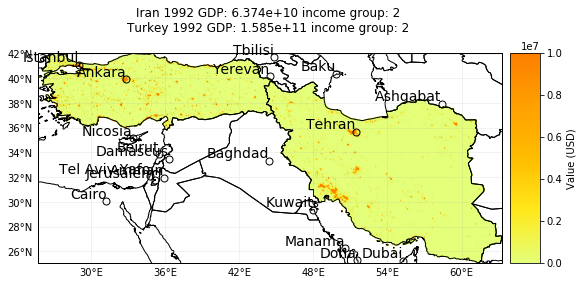

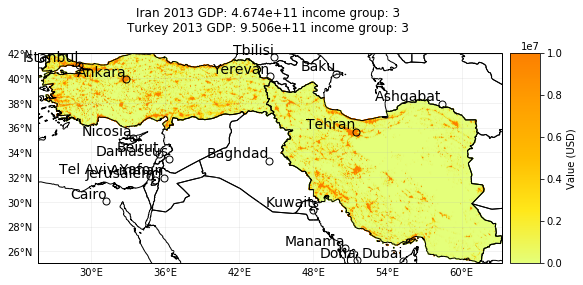

In [1]:
%matplotlib inline
from climada.entity import BlackMarble

irn_tur_1992 = BlackMarble()
irn_tur_1992.set_countries(['Iran', 'Turkey'], 1992, res_km=1.0)
irn_tur_1992.plot_hexbin(vmax=1e7)

irn_tur_2013 = BlackMarble()
irn_tur_2013.set_countries(['Iran', 'Turkey'], 2013, res_km=1.0)
irn_tur_2013.plot_hexbin(vmax=1e7)

In [2]:
irn_tur_1992.value.size

3417059

Higher resolution is obtained by interpolating the night lights. If the resolution (parameter `res_km`) is not provided, the resolution of the nightlight images is going to be used.

2019-10-29 21:07:40,432 - climada.util.finance - INFO - GDP CHE 2013: 6.885e+11.
2019-10-29 21:07:40,485 - climada.util.finance - INFO - Income group CHE 2013: 4.
2019-10-29 21:07:40,485 - climada.entity.exposures.black_marble - INFO - Nightlights from NOAA's earth observation group for year 2013.
2019-10-29 21:07:40,657 - climada.entity.exposures.black_marble - INFO - Processing country Switzerland.
2019-10-29 21:07:40,772 - climada.entity.exposures.black_marble - INFO - Generating resolution of approx 0.3 km.


/Users/aznarsig/Documents/Python/climada_python/climada/util/plot.py:318: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  fig.tight_layout()


2019-10-29 21:07:52,111 - climada.util.finance - INFO - GDP CHE 2013: 6.885e+11.
2019-10-29 21:07:52,162 - climada.util.finance - INFO - Income group CHE 2013: 4.
2019-10-29 21:07:52,163 - climada.entity.exposures.black_marble - INFO - Nightlights from NASA's earth observatory for year 2012.
2019-10-29 21:07:52,164 - climada.entity.exposures.nightlight - DEBUG - Found all required satellite data (1 files) in folder /Users/aznarsig/Documents/Python/climada_python/data/system
2019-10-29 21:07:52,165 - climada.entity.exposures.nightlight - DEBUG - All required files already exist. No downloads necessary.
2019-10-29 21:08:02,083 - climada.entity.exposures.black_marble - INFO - Processing country Switzerland.
2019-10-29 21:08:02,538 - climada.entity.exposures.black_marble - INFO - Generating resolution of approx 0.3 km.


/Users/aznarsig/Documents/Python/climada_python/climada/util/plot.py:318: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  fig.tight_layout()


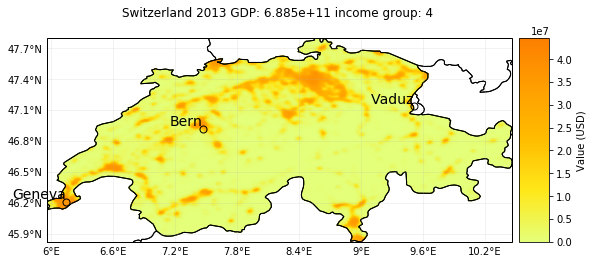

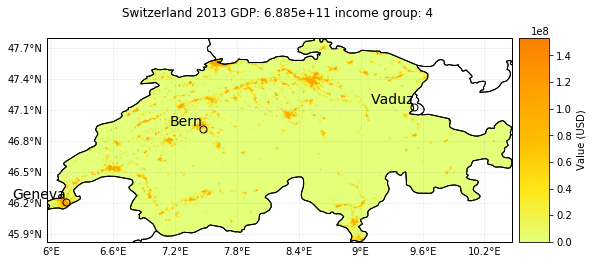

In [3]:
che = BlackMarble()
che.set_countries(['Switzerland'], 2013, res_km=0.3)
che.plot_hexbin()

# use the NASA files (only available for 2012 and 2016) to interpolate from higher resolution
che = BlackMarble()
che.set_countries(['Switzerland'], 2013, res_km=0.3, from_hr=True)
che.plot_hexbin()

2019-10-29 21:08:39,483 - climada.util.finance - INFO - GDP CHN 2013: 9.570e+12.
2019-10-29 21:08:39,536 - climada.util.finance - INFO - Income group CHN 2013: 3.
2019-10-29 21:08:39,536 - climada.entity.exposures.black_marble - INFO - Nightlights from NOAA's earth observation group for year 2013.
2019-10-29 21:08:39,705 - climada.entity.exposures.black_marble - INFO - Processing country China.
2019-10-29 21:09:08,251 - climada.entity.exposures.black_marble - INFO - Generating resolution of approx 5.0 km.


/Users/aznarsig/Documents/Python/climada_python/climada/util/plot.py:318: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  fig.tight_layout()


/Users/aznarsig/anaconda3/envs/climada_env/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 156 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/aznarsig/anaconda3/envs/climada_env/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 156 missing from current font.
  font.set_text(s, 0, flags=flags)


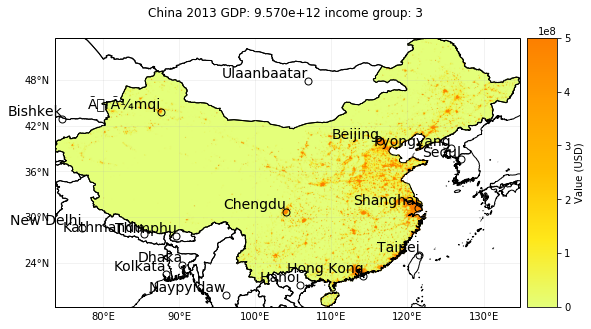

In [4]:
chn = BlackMarble()
chn.set_countries(['China'], 2013, res_km=5.0)
chn.plot_hexbin(vmax=5e8)

Sea points can be added with the desired resolution. Their value will be 0.

2019-10-29 21:09:29,629 - climada.util.finance - INFO - GDP AUS 2013: 1.576e+12.
2019-10-29 21:09:29,683 - climada.util.finance - INFO - Income group AUS 2013: 4.
2019-10-29 21:09:29,684 - climada.entity.exposures.black_marble - INFO - Nightlights from NOAA's earth observation group for year 2013.
2019-10-29 21:09:29,871 - climada.entity.exposures.black_marble - INFO - Processing country Australia.
2019-10-29 21:09:48,137 - climada.entity.exposures.black_marble - INFO - Generating resolution of approx 2.0 km.


/Users/aznarsig/Documents/Python/climada_python/climada/util/plot.py:318: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  fig.tight_layout()


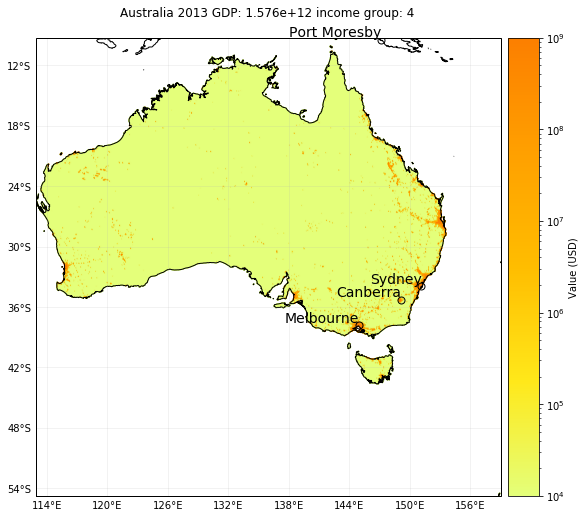

In [5]:
aus = BlackMarble()
aus.set_countries(['Australia'], 2013, res_km=2.0, sea_res=(100, 10))
from matplotlib import colors
norm=colors.LogNorm(vmin=1.0e4, vmax=1.0e9)
aus.plot_hexbin(norm=norm)

If you don't write the country name right, the error log will provide you with possible similar options.

2019-10-29 21:10:45,032 - climada.entity.exposures.black_marble - ERROR - Country Hong Kong not found. Possible options: ['Hong Kong S.A.R.']
Error caught.
2019-10-29 21:10:46,535 - climada.util.finance - INFO - GDP HKG 2016: 3.209e+11.
2019-10-29 21:10:46,651 - climada.util.finance - INFO - Income group HKG 2016: 4.
2019-10-29 21:10:46,651 - climada.entity.exposures.black_marble - INFO - Nightlights from NASA's earth observatory for year 2016.
2019-10-29 21:10:46,655 - climada.entity.exposures.nightlight - DEBUG - Found all required satellite data (1 files) in folder /Users/aznarsig/Documents/Python/climada_python/data/system
2019-10-29 21:10:46,656 - climada.entity.exposures.nightlight - DEBUG - All required files already exist. No downloads necessary.
2019-10-29 21:10:55,140 - climada.entity.exposures.black_marble - INFO - Processing country Hong Kong S.A.R..
2019-10-29 21:10:55,159 - climada.entity.exposures.black_marble - INFO - Generating resolution of approx 0.2 km.


/Users/aznarsig/anaconda3/envs/climada_env/lib/python3.7/site-packages/scipy/ndimage/interpolation.py:605: UserWarning: From scipy 0.13.0, the output shape of zoom() is calculated with round() instead of int() - for these inputs the size of the returned array has changed.
  "the returned array has changed.", UserWarning)
/Users/aznarsig/Documents/Python/climada_python/climada/util/plot.py:318: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  fig.tight_layout()


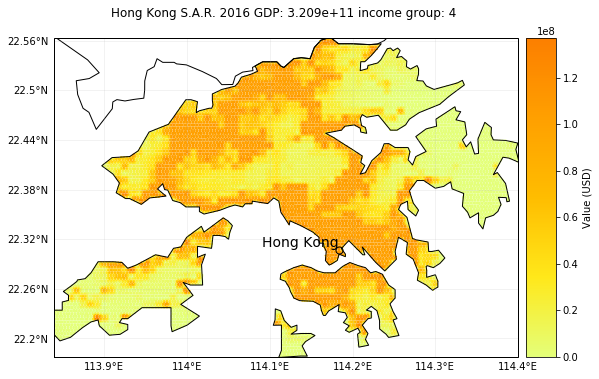

In [6]:
hkg = BlackMarble()
try:
    hkg.set_countries(['Hong Kong'], 2016, res_km=0.2)
except ValueError:
    print('Error caught.')
    hkg.set_countries(['Hong Kong S.A.R.'], 2016, res_km=0.2)
    hkg.plot_hexbin(gridsize=500)

The GDP and income group can be given as inputs. Void values will indicate that the ones computed by Black Marble are used.

2019-10-29 21:10:57,942 - climada.entity.exposures.black_marble - INFO - Nightlights from NOAA's earth observation group for year 2013.
2019-10-29 21:10:58,137 - climada.entity.exposures.black_marble - INFO - Processing country Argentina.
2019-10-29 21:11:06,398 - climada.entity.exposures.black_marble - INFO - Generating resolution of approx 1.0 km.
2019-10-29 21:11:06,835 - climada.entity.exposures.black_marble - INFO - Processing country Uruguay.
2019-10-29 21:11:07,155 - climada.entity.exposures.black_marble - INFO - Generating resolution of approx 1.0 km.


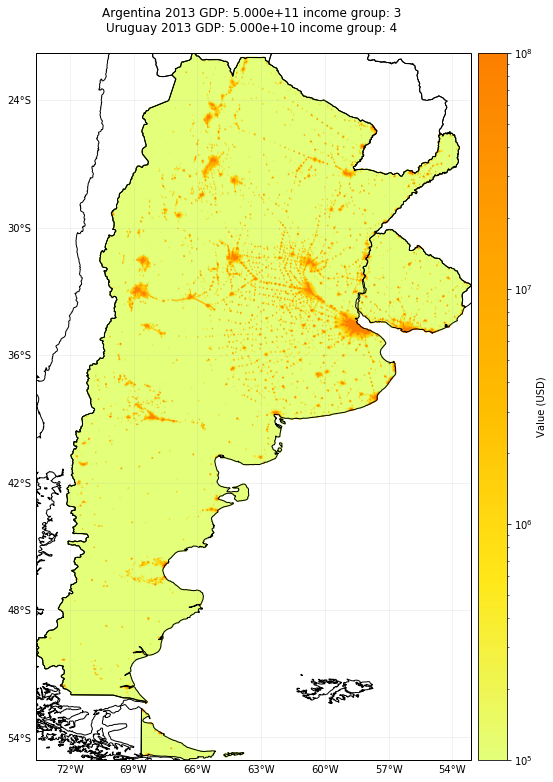

In [7]:
au = BlackMarble()
au.set_countries(['Argentina', 'Uruguay'], 2013, res_km=1.0, gdp={'ARG': 5e11, 'URY': 5e10}, inc_grp={'ARG': 3, 'URY': 4})
norm=colors.LogNorm(vmin=1.0e5, vmax=1.0e8)
au.plot_hexbin(pop_name=False, norm=norm)

Finally, also provinces can be modelled using the country data as follows:

2019-10-29 21:12:05,383 - climada.util.finance - INFO - GDP DEU 2012: 3.544e+12.
2019-10-29 21:12:05,454 - climada.util.finance - INFO - Income group DEU 2012: 4.
2019-10-29 21:12:06,218 - climada.util.finance - INFO - GDP CZE 2012: 2.074e+11.
2019-10-29 21:12:06,274 - climada.util.finance - INFO - Income group CZE 2012: 4.
2019-10-29 21:12:06,274 - climada.entity.exposures.black_marble - INFO - Nightlights from NASA's earth observatory for year 2012.
2019-10-29 21:12:06,303 - climada.entity.exposures.nightlight - DEBUG - Found all required satellite data (1 files) in folder /Users/aznarsig/Documents/Python/climada_python/data/system
2019-10-29 21:12:06,303 - climada.entity.exposures.nightlight - DEBUG - All required files already exist. No downloads necessary.
2019-10-29 21:12:17,907 - climada.entity.exposures.black_marble - INFO - Processing country Germany.
2019-10-29 21:12:21,688 - climada.entity.exposures.black_marble - INFO - Generating resolution of approx 1.0 km.
2019-10-29 21:

/Users/aznarsig/Documents/Python/climada_python/climada/util/plot.py:318: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  fig.tight_layout()


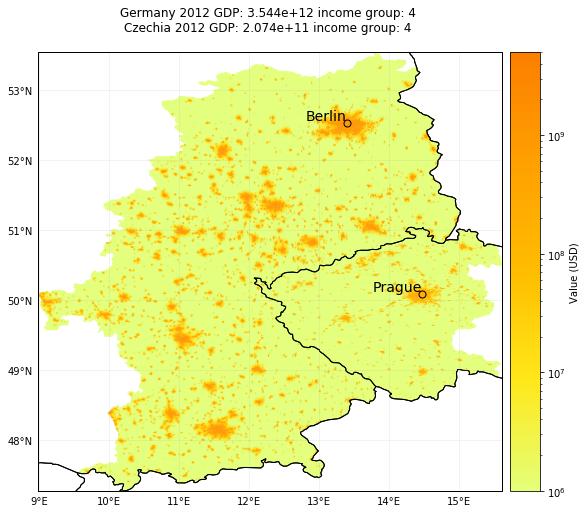

In [8]:
country_name = {'Germany': ['Berlin', 'Brandenburg', 'Bayern', 'Sachsen', 'ThÃ¼ringen', 'Sachsen-Anhalt'],
                'Czechia': ['Prague', 'KarlovarskÃ½', 'Ã\x9asteckÃ½', 'LibereckÃ½', 'StÅ\x99edoÄ\x8deskÃ½', 'PlzeÅ\x88skÃ½', 'JihoÄ\x8deskÃ½']}

ent = BlackMarble()
ent.set_countries(country_name, 2012, res_km=1.0, from_hr=True)

from matplotlib import colors
norm=colors.LogNorm(vmin=1.0e6, vmax=5.0e9)
ent.plot_hexbin(norm=norm)

Countries with oversea territories might take longer to compute. The USA using 0.5km resolution might take longer... (10min approx)

2019-10-29 21:12:37,625 - climada.util.finance - INFO - GDP USA 2017: 1.949e+13.
2019-10-29 21:12:37,756 - climada.util.finance - INFO - Income group USA 2017: 4.
2019-10-29 21:12:37,757 - climada.entity.exposures.black_marble - INFO - Nightlights from NASA's earth observatory for year 2016.
2019-10-29 21:12:38,416 - climada.entity.exposures.nightlight - DEBUG - Found all required satellite data (4 files) in folder /Users/aznarsig/Documents/Python/climada_python/data/system
2019-10-29 21:12:38,417 - climada.entity.exposures.nightlight - DEBUG - All required files already exist. No downloads necessary.
2019-10-29 21:17:16,866 - climada.entity.exposures.black_marble - INFO - Processing country United States Of America.
2019-10-29 21:24:50,454 - climada.entity.exposures.black_marble - INFO - Generating resolution of approx 0.5 km.


/Users/aznarsig/Documents/Python/climada_python/climada/util/plot.py:318: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  fig.tight_layout()


Number of points: 4287405


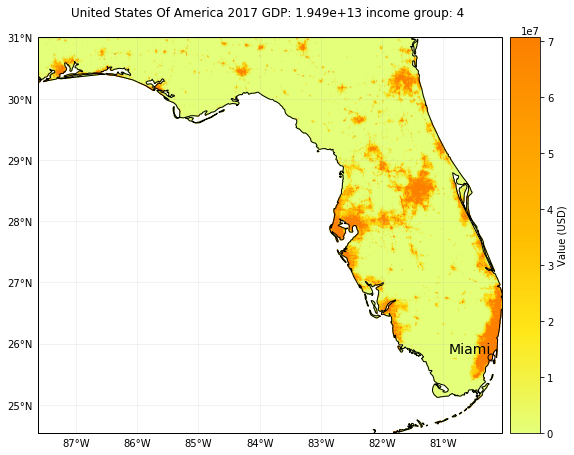

In [9]:
country_name = {'United States Of America': ['Florida']}

flr = BlackMarble()
flr.set_countries(country_name, 2017)
flr.plot_hexbin()
print('Number of points:', flr.size)

The polynomial transformation used in the nightlight intensity can be also set through the parameter `poly_val`. The default transformation is x^2; not transforming the intensities has this result:

2019-10-29 21:25:18,781 - climada.util.finance - INFO - GDP DEU 2012: 3.544e+12.
2019-10-29 21:25:18,844 - climada.util.finance - INFO - Income group DEU 2012: 4.
2019-10-29 21:25:19,436 - climada.util.finance - INFO - GDP CZE 2012: 2.074e+11.
2019-10-29 21:25:19,489 - climada.util.finance - INFO - Income group CZE 2012: 4.
2019-10-29 21:25:19,490 - climada.entity.exposures.black_marble - INFO - Nightlights from NASA's earth observatory for year 2012.
2019-10-29 21:25:19,525 - climada.entity.exposures.nightlight - DEBUG - Found all required satellite data (1 files) in folder /Users/aznarsig/Documents/Python/climada_python/data/system
2019-10-29 21:25:19,526 - climada.entity.exposures.nightlight - DEBUG - All required files already exist. No downloads necessary.
2019-10-29 21:25:30,260 - climada.entity.exposures.black_marble - INFO - Processing country Germany.
2019-10-29 21:25:34,658 - climada.entity.exposures.black_marble - INFO - Generating resolution of approx 1.0 km.
2019-10-29 21:

/Users/aznarsig/Documents/Python/climada_python/climada/util/plot.py:318: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  fig.tight_layout()


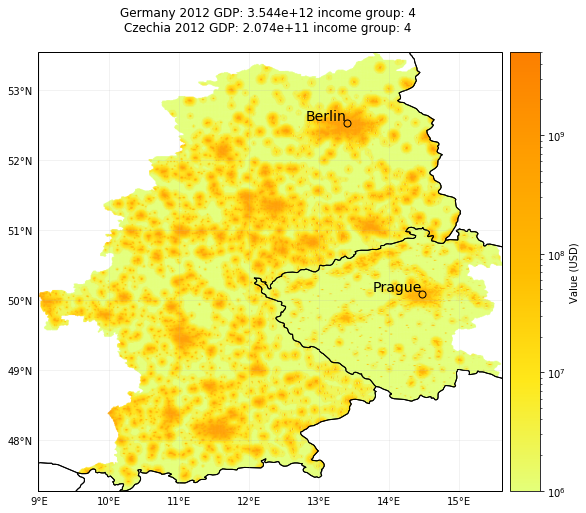

In [10]:
country_name = {'Germany': ['Berlin', 'Brandenburg', 'Bayern', 'Sachsen', 'ThÃ¼ringen', 'Sachsen-Anhalt'],
                'Czechia': ['Prague', 'KarlovarskÃ½', 'Ã\x9asteckÃ½', 'LibereckÃ½', 'StÅ\x99edoÄ\x8deskÃ½', 'PlzeÅ\x88skÃ½', 'JihoÄ\x8deskÃ½']}

ent = BlackMarble()
# linear transformation
ent.set_countries(country_name, 2012, res_km=1.0, from_hr=True, poly_val=[0, 1])

from matplotlib import colors
norm=colors.LogNorm(vmin=1.0e6, vmax=5.0e9)
ent.plot_hexbin(norm=norm)